In [12]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import torch.nn.functional as F
import numpy as np
from torchvision import transforms as tfs

# torch.manual_seed(1)
def train_tf(x):
    im_aug = tfs.Compose([
        tfs.Resize(120),
        tfs.RandomRotation(30),
        tfs.RandomAffine(degrees=0, translate=(3, 3), scale=None, shear=None, resample=False, fillcolor=0),
        tfs.ToTensor(),
        # tfs.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
    x = im_aug(x)
    return x


DOWNLOAD_MNIST = True


train_data = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=train_tf,
                                        download=DOWNLOAD_MNIST, )
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
print(train_data.train_data.shape)

train_x = torch.unsqueeze(train_data.train_data, dim=1).type(torch.FloatTensor) / 255.
train_y = train_data.train_labels
print(train_x.shape)

test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000] / 255.  # Tensor on GPU
test_y = test_data.test_labels[:2000]

torch.Size([60000, 28, 28])
torch.Size([60000, 1, 28, 28])


F:\anaconda3\envs\test\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
F:\anaconda3\envs\test\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
F:\anaconda3\envs\test\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
F:\anaconda3\envs\test\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [13]:
test_x.shape

torch.Size([2000, 1, 28, 28])

In [14]:
import matplotlib.pyplot as plt

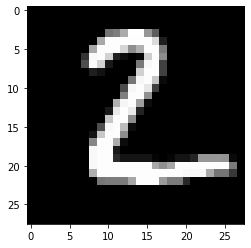

In [15]:
plt.imshow(test_x[1,0,:,:].numpy(), 'gray')

In [16]:
test_y[:10]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [17]:
class NET(nn.Module):
    def __init__(self):
        super(NET, self).__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2,), nn.ReLU(), 
                                   nn.MaxPool2d(2),)
        self.dropout1 = nn.Dropout(0.3)
        self.conv2 = nn.Sequential(nn.Conv2d(16, 32, 5, 1, 2), nn.ReLU(), nn.MaxPool2d(2),)
        self.dropout2 = nn.Dropout(0.5)
        self.conv3 = nn.Sequential(nn.Conv2d(32, 64, 4, 1, 2), nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(2))
        self.linear1 = nn.Linear(64 * 4 * 4, 10)
        self.bn = nn.BatchNorm1d(10)

    def forward(self, x):
        x = self.conv1(x)
        self.dropout1
        x = self.conv2(x)
        self.dropout2
        x = self.conv3(x)
        self.dropout2       
        x = x.view(x.size(0), -1)
        x = self.linear1(x)

        output = self.bn(x)
        return output


data_size = 20000
batch_size = 32
EPOCH = 3
LR = 0.002

net = NET()
# print(fc)

optimizer = torch.optim.Adam(net.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()



for epoch in range(EPOCH):
    random_indx = np.random.permutation(data_size)
    for batch_i in range(data_size // batch_size):
        indx = random_indx[batch_i * batch_size:(batch_i + 1) * batch_size]

        b_x = train_x[indx, :]
        b_y = train_y[indx]
        # print(b_x.shape)
        # print(b_y.shape)

        output = net(b_x)
        loss = loss_func(output, b_y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch_i % 50 == 0:
            test_output = net(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            # pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = torch.sum(pred_y == test_y).type(torch.FloatTensor) / test_y.size(0)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.cpu().numpy(), '| test accuracy: %.3f' % accuracy)

test_output = net(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

Epoch:  0 | train loss: 2.8338 | test accuracy: 0.403
Epoch:  0 | train loss: 0.6470 | test accuracy: 0.947
Epoch:  0 | train loss: 0.5726 | test accuracy: 0.951
Epoch:  0 | train loss: 0.3787 | test accuracy: 0.965
Epoch:  0 | train loss: 0.3894 | test accuracy: 0.969
Epoch:  0 | train loss: 0.4790 | test accuracy: 0.973
Epoch:  0 | train loss: 0.4183 | test accuracy: 0.977
Epoch:  0 | train loss: 0.1873 | test accuracy: 0.981
Epoch:  0 | train loss: 0.2982 | test accuracy: 0.976
Epoch:  0 | train loss: 0.1809 | test accuracy: 0.978
Epoch:  0 | train loss: 0.2417 | test accuracy: 0.983
Epoch:  0 | train loss: 0.3181 | test accuracy: 0.979
Epoch:  0 | train loss: 0.2491 | test accuracy: 0.980
Epoch:  1 | train loss: 0.3246 | test accuracy: 0.976
Epoch:  1 | train loss: 0.2366 | test accuracy: 0.982
Epoch:  1 | train loss: 0.1431 | test accuracy: 0.982
Epoch:  1 | train loss: 0.1077 | test accuracy: 0.984
Epoch:  1 | train loss: 0.2690 | test accuracy: 0.979
Epoch:  1 | train loss: 0.09

In [18]:
test_output = net(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:1], 'real number')

tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]) prediction number
tensor([7]) real number


In [19]:
test_output

tensor([[-0.5148, -1.6886, -0.2020,  2.1076, -1.2084,  2.0610, -1.1489,  6.6510,
          0.1965, -0.6906],
        [-0.5032, -0.8868,  6.1507,  0.8852, -1.9419, -3.9381,  1.0275, -1.4812,
         -4.0723, -0.7199],
        [-0.5760,  4.4933, -1.8307,  0.6050, -1.2303,  1.4094, -0.5799,  0.3083,
          1.5547, -1.2865],
        [ 6.7932, -1.3200, -1.3024,  0.1200,  0.1831,  1.2298, -0.8510, -1.1115,
         -2.1393, -1.2418],
        [-0.1823,  0.0461, -1.7431,  2.3956,  5.2047, -1.5921,  0.8286, -0.7187,
          2.8944, -1.2650],
        [-0.1189,  5.2089, -1.5124,  1.8688, -0.9024,  0.9153, -0.3378,  0.4611,
          1.8777, -1.1348],
        [-1.9824, -0.6294, -0.7575, -1.2792,  3.4165, -0.8167,  0.3172, -0.2270,
          2.7097, -0.8266],
        [-1.8534, -0.6427,  0.0829, -1.9258, -0.4612, -2.9060, -4.0948, -2.4369,
         -2.2448,  3.9605],
        [-0.7496, -2.2075,  0.0648, -5.6847, -1.9352,  2.7450,  5.5631, -0.7312,
         -0.1654, -1.8974],
        [-0.2254, -

In [20]:
test_x[:1].shape

torch.Size([1, 1, 28, 28])

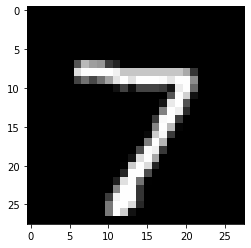

In [21]:
plt.imshow(test_x[:1].numpy().squeeze(), 'gray')

In [22]:
import torch
torch.eye(10)
0, 1, 2, ..., 9 

(0, 1, 2, Ellipsis, 9)